In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [12]:
df = pd.read_csv("nvidia_stock_prices.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-01-02,0.196417,0.199083,0.192333,0.192333,436416000
1,2004-01-05,0.195250,0.199917,0.193500,0.198583,575292000
2,2004-01-06,0.198000,0.209417,0.197083,0.206667,1093344000
3,2004-01-07,0.204333,0.209500,0.202917,0.208500,673032000
4,2004-01-08,0.211083,0.212083,0.207250,0.209250,433752000


In [13]:
df.drop_duplicates(inplace=True)
df.fillna('NA', inplace=True)

print(df.duplicated().sum())
print(df.isnull().sum())

0
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


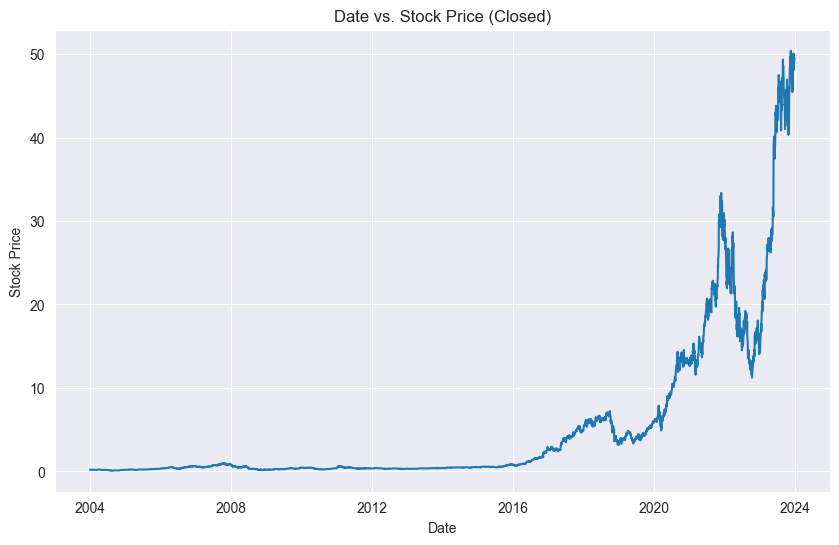

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Date vs. Stock Price (Closed)')
plt.show()

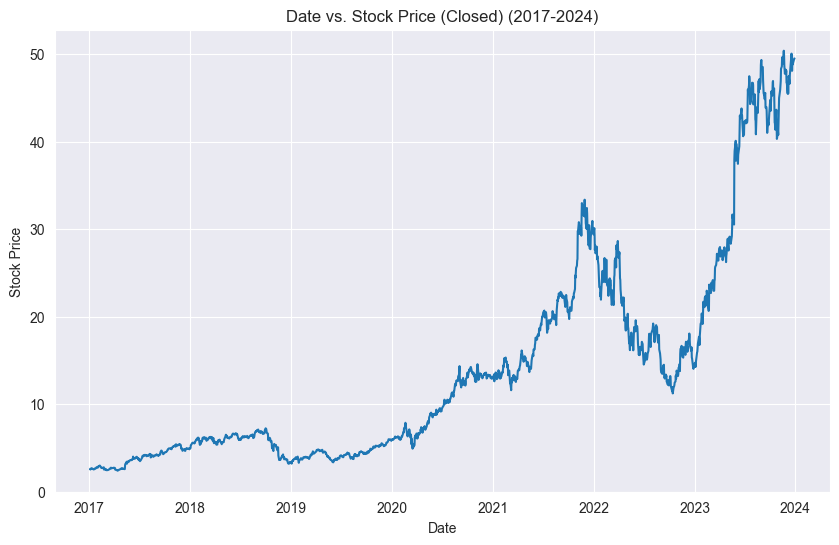

In [15]:
# Check for duration (2017-2024)
df_filtered = df[df['Date'] > '2016-12-31']

plt.figure(figsize=(10,6))
plt.plot(df_filtered['Date'],df_filtered['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Date vs. Stock Price (Closed) (2017-2024)')
plt.show()

In [16]:
# Get the earliest date in your dataset
start_date = df['Date'].min()

# Convert 'Date' to number of days since the start date, in place
df['Date'] = (df['Date'] - start_date).dt.total_seconds() / (24 * 60 * 60)
df = df.rename(columns={'Date': 'Days'})

# Stock Price after {trend_days} days
trend_days = 21
df['Predicted'] = df['Close'].shift(-trend_days)
print(df[['Close', 'Predicted']])
df

          Close  Predicted
0      0.192333   0.187750
1      0.198583   0.182667
2      0.206667   0.185417
3      0.208500   0.189667
4      0.209250   0.188333
...         ...        ...
5028  48.830002        NaN
5029  49.278999        NaN
5030  49.417000        NaN
5031  49.521999        NaN
5032  49.521999        NaN

[5033 rows x 2 columns]


,Days,Open,High,Low,Close,Volume,Predicted
0,0.0,0.196417,0.199083,0.192333,0.192333,436416000,0.187750
1,3.0,0.195250,0.199917,0.193500,0.198583,575292000,0.182667
2,4.0,0.198000,0.209417,0.197083,0.206667,1093344000,0.185417
3,5.0,0.204333,0.209500,0.202917,0.208500,673032000,0.189667
4,6.0,0.211083,0.212083,0.207250,0.209250,433752000,0.188333
...,...,...,...,...,...,...,...
5028,7294.0,49.195000,49.382999,48.466999,48.830002,252507000,NaN
5029,7298.0,48.967999,49.599998,48.959999,49.278999,244200000,NaN
5030,7299.0,49.511002,49.680000,49.084999,49.417000,233648000,NaN
5031,7300.0,49.643002,49.883999,49.411999,49.521999,246587000,NaN


In [10]:
X = df.drop(['Predicted'], axis=1)[:-trend_days]
print(X)

        Days       Open       High        Low      Close      Volume
0        0.0   0.196417   0.199083   0.192333   0.192333   436416000
1        3.0   0.195250   0.199917   0.193500   0.198583   575292000
2        4.0   0.198000   0.209417   0.197083   0.206667  1093344000
3        5.0   0.204333   0.209500   0.202917   0.208500   673032000
4        6.0   0.211083   0.212083   0.207250   0.209250   433752000
...      ...        ...        ...        ...        ...         ...
5007  7264.0  49.852001  50.334999  47.689999  48.716000   899420000
5008  7266.0  48.470001  48.921001  47.744999  47.776001   294645000
5009  7269.0  47.799999  48.529999  47.652000  48.242001   395662000
5010  7270.0  48.236000  48.323002  47.473000  47.820999   401491000
5011  7271.0  48.379002  48.762001  47.860001  48.139999   382005000

[5012 rows x 6 columns]


In [9]:
y = df['Predicted'][:-trend_days]
print(y)

0        0.187750
1        0.182667
2        0.185417
3        0.189667
4        0.188333
          ...    
5007    48.830002
5008    49.278999
5009    49.417000
5010    49.521999
5011    49.521999
Name: Predicted, Length: 5012, dtype: float64


In [10]:
# Split dataset into 80:20 for training & testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [11]:
# Decision Tree Model / Train the model
tree = DecisionTreeRegressor().fit(X_train, y_train)

In [12]:
future_pred = df.drop('Predicted', axis=1).iloc[-2*trend_days:-trend_days]
future_pred

,Days,Open,High,Low,Close,Volume
4991,7242.0,40.450001,40.879002,39.230000,40.779999,517969000
4992,7243.0,40.883999,42.381001,40.868999,42.325001,437593000
4993,7244.0,43.327999,43.883999,42.894001,43.506001,409172000
4994,7245.0,44.020000,45.308998,43.723000,45.005001,424610000
4995,7248.0,45.285000,45.935001,44.898998,45.750999,400733000
4996,7249.0,45.719002,46.217999,45.158001,45.955002,343165000
4997,7250.0,46.099998,46.867001,45.967999,46.574001,346719000
4998,7251.0,47.466999,48.230000,46.750000,46.950001,540496000
4999,7252.0,47.500000,48.472000,47.283001,48.334999,421245000
5000,7255.0,48.320000,49.116001,48.098999,48.619999,384136000


In [13]:
tree_pred = tree.predict(future_pred)

print("Decision Tree Prediction:\n", tree_pred)

Decision Tree Prediction:
 [46.77000046 46.76499939 48.7159996  46.56600189 45.50299835 46.59600067
 47.50600052 46.6269989  47.6570015  47.6570015  48.34999847 48.88999939
 50.07699966 49.60400009 48.11100006 48.99000168 48.83000183 49.60400009
 49.41699982 49.52199936 49.52199936]


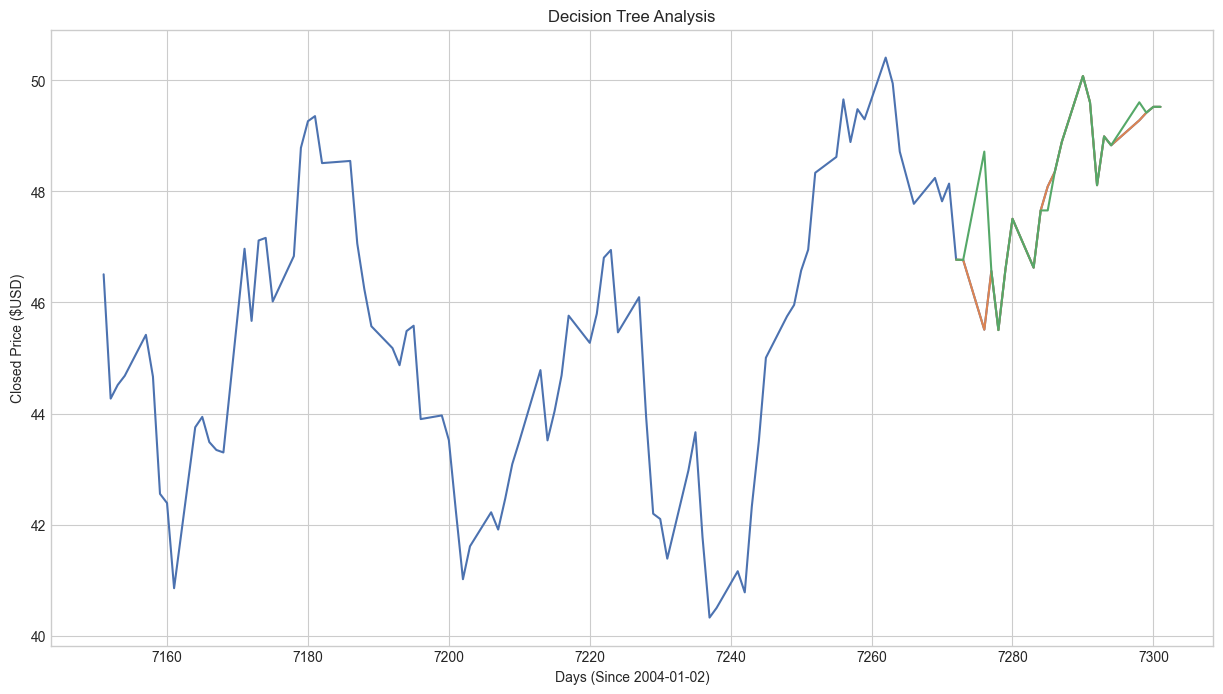

In [14]:
import warnings
warnings.filterwarnings('ignore')

df_filtered = df[df['Days'] > 7150]

# Visualization
# Set the style for the plot
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

# Create a new column 'Predictions' in the df DataFrame
predictions = tree_pred

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
valid_filtered = valid[valid['Days'] > 7150]

plt.figure(figsize=(15,8))
plt.title('Decision Tree Analysis')
plt.xlabel('Days (Since 2004-01-02)')
plt.ylabel('Closed Price ($USD)')
plt.plot(df_filtered['Days'], df_filtered['Close'], label='Actual Close')
plt.plot(valid_filtered['Days'], valid_filtered['Close'], label='Valid Close')
plt.plot(valid_filtered['Days'], valid_filtered['Predictions'], label='Predictions')
plt.show()

In [15]:
# Save the model

with open('decision_tree_regressor.pkl', 'wb') as model_file:
    pickle.dump(tree, model_file)

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Evaluation Metrics
mse = mean_squared_error(df['Close'][-21:], tree_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.5033252620937912
Root Mean Squared Error: 0.7094542001382409
